# Lab 2. Windowing (Varaint 2)


Installing libs

In [81]:
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing libs

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

Setting variables (Variant 2)

In [83]:
f1 = 400 # hz
f2 = 400.25
f3 = 399.75

# |x[k]| max
amplitude = 2
sampling_frequency = 600
N = 3000
k = np.arange(N)

x1 = amplitude * np.sin(2 * np.pi * f1 / sampling_frequency * k)
x2 = amplitude * np.sin(2 * np.pi * f2 / sampling_frequency * k)
x3 = amplitude * np.sin(2 * np.pi * f3 / sampling_frequency * k)

Setting windows

In [84]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

Plotting windows

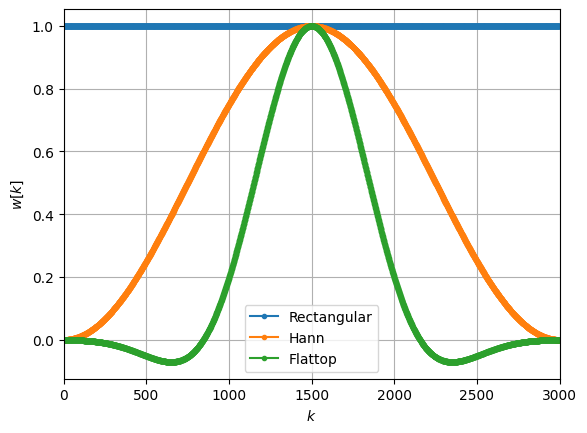

In [85]:
plt.plot(wrect, 'C0o-', label='Rectangular', ms = 3)
plt.plot(whann, 'C1o-', label='Hann', ms = 3)
plt.plot(wflattop, 'C2o-', label='Flattop', ms = 3)

plt.xlabel(r'$k$')
plt.ylabel(r'$w[k]$')
plt.xlim(0, N)
plt.legend()
plt.grid()

# DFT spectra using FFT algorithm

In [86]:
X1_wrect = fft(x1)
X2_wrect = fft(x2)
x3_wrect = fft(x3)

X1_whann = fft(x1 * whann)
X2_whann = fft(x2 * whann)
x3_whann = fft(x3 * whann)

X1_wflattop = fft(x1 * wflattop)
X2_wflattop = fft(x2 * wflattop)
x3_wflattop = fft(x3 * wflattop)

In [87]:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X  # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1 / 2  # bin for f=0 Hz is existing only once, so cancel *2 from above
    if N % 2 == 0:  # fs/2 is included as a bin
        # fs/2 bin is existing only once, so cancel *2 from above
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # in dB

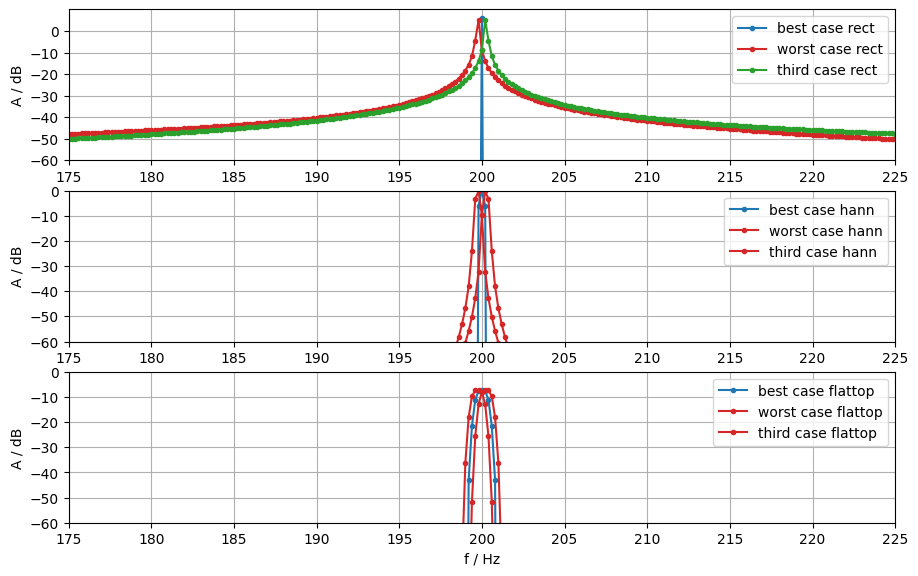

In [97]:
df = sampling_frequency / N
f = np.arange (N) * df

plt.figure(figsize=(16 / 1.5, 10 / 1.5))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1_wrect), 'C0o-', ms=3, label='best case rect')
plt.plot(f, fft2db(X2_wrect), 'C3o-', ms=3, label='worst case rect')
plt.plot(f, fft2db(x3_wrect), 'C2o-', ms=3, label='third case rect')
plt.xlim(175, 225)
plt.ylim(-60, 10)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1_whann), 'C0o-', ms=3, label='best case hann')
plt.plot(f, fft2db(X2_whann), 'C3o-', ms=3, label='worst case hann')
plt.plot(f, fft2db(x3_whann), 'C3o-', ms=3, label='third case hann')
plt.xlim(195, 205)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1_wflattop), 'C0o-', ms=3, label='best case flattop')
plt.plot(f, fft2db(X2_wflattop), 'C3o-', ms=3, label='worst case flattop')
plt.plot(f, fft2db(x3_wflattop), 'C3o-', ms=3, label='third case flattop')
plt.xlim(195, 205)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

# Window DTFT spectra normalized to their mainlobe maximum.

In [89]:
def winDTFTdB(w):
    N = w.size  # get window length
    Nz = 100 * N  # zero-padding length
    W = np.zeros(Nz)  # allocate RAM
    W[0:N] = w  # insert window
    W = np.abs(fftshift(fft(W)))  # fft, fftshift and magnitude
    W /= np.max(W)  # normalize to maximum, i.e. the mainlobe maximum here
    W = 20 * np.log10(W)  # get level in dB
    # get appropriate digital frequencies
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # also shifted
    return Omega, W

C:\Users\Adrian\AppData\Local\Temp\ipykernel_22512\2545321091.py:8: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)  # get level in dB


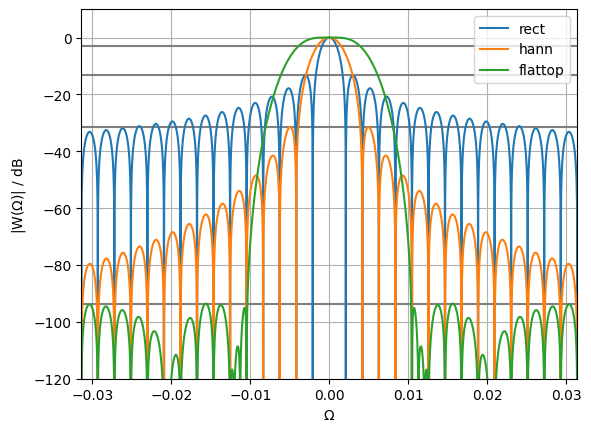

In [100]:
plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray')  # mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray')  # rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray')  # hann max sidelobe
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], 'gray')  # flattop max sidelobe

Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='rect')
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='hann')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='flattop')

plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlim(-np.pi / 100, np.pi / 100)  # zoom into mainlobe
plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)